In [ ]:
# !pip install -qU "langchain[openai]"

In [1]:
import os
import getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"var: ")

_set_env("OPENAI_API_KEY")

In [2]:
from langchain.chat_models import init_chat_model

model = init_chat_model(
    "gpt-4o-mini", 
    model_provider="openai")

model.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_80cf447eee', 'finish_reason': 'stop', 'logprobs': None}, id='run-afb3cd7e-5cb5-41d3-ac21-42a89843feb1-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

# Full LLM App in LangChain

In [3]:
import getpass
import os

try:
    # load environment variables from .env file (requires `python-dotenv`)
    from dotenv import load_dotenv

    load_dotenv()
except ImportError:
    pass

os.environ["LANGSMITH_TRACING"] = "true"
if "LANGSMITH_API_KEY" not in os.environ:
    os.environ["LANGSMITH_API_KEY"] = getpass.getpass(
        prompt="Enter your LangSmith API key (optional): "
    )
if "LANGSMITH_PROJECT" not in os.environ:
    os.environ["LANGSMITH_PROJECT"] = getpass.getpass(
        prompt='Enter your LangSmith Project Name (default = "default"): '
    )
    if not os.environ.get("LANGSMITH_PROJECT"):
        os.environ["LANGSMITH_PROJECT"] = "default"
if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass(
        prompt="Enter your OpenAI API key (required if using OpenAI): "
    )

In [8]:
from langchain.chat_models import init_chat_model

model = init_chat_model(
    "gpt-4o-mini",
    model_provider="openai"
)

model.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_80cf447eee', 'finish_reason': 'stop', 'logprobs': None}, id='run-6f4260e7-2cab-48a9-993b-8fa7cb0d07c8-0', usage_metadata={'input_tokens': 8, 'output_tokens': 10, 'total_tokens': 18, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [9]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("Translate the following from English into Italian"),
    HumanMessage("Hi! Let's learn about large language models!"),
]

model.invoke(messages)

AIMessage(content='Ciao! Impariamo sui modelli di linguaggio di grandi dimensioni!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 27, 'total_tokens': 45, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_80cf447eee', 'finish_reason': 'stop', 'logprobs': None}, id='run-62b6fced-de60-46f1-bcbb-84dcfb55ac7e-0', usage_metadata={'input_tokens': 27, 'output_tokens': 18, 'total_tokens': 45, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [10]:
model.invoke("Hi")

model.invoke([{"role": "user", "content": "How are ya?"}])

model.invoke([HumanMessage("How's it going?")])

AIMessage(content="I'm doing well, thank you! How about you? How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 12, 'total_tokens': 31, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_80cf447eee', 'finish_reason': 'stop', 'logprobs': None}, id='run-1f42cd81-de35-4803-8670-5ac27f612aad-0', usage_metadata={'input_tokens': 12, 'output_tokens': 19, 'total_tokens': 31, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [12]:
for token in model.stream("Tell me the 3 funniest jokes you know"):
    print(token.content, end="|")

|Sure|!| Here| are| three| funny| jokes| for| you|:

|1|.| **|Why| don|’t| scientists| trust| atoms|?|**|  
|  | Because| they| make| up| everything|!

|2|.| **|What| do| you| call| fake| spaghetti|?|**|  
|  | An| imp|asta|!

|3|.| **|Why| did| the| scare|crow| win| an| award|?|**|  
|  | Because| he| was| outstanding| in| his| field|!

|I| hope| these| brought| a| smile| to| your| face|!||

In [13]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "Translate the following from {language_source} into {language_target}"

prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template), ("human", "{input_sentence}")]
)

prompt_template.format(language_source="English", language_target="French", input_sentence="I love programming in Python")

'System: Translate the following from English into French\nHuman: I love programming in Python'

In [16]:
prompt = prompt_template.invoke({"language_source": "English", "language_target": "French", "input_sentence": "I love programming in Python"})
response = model.invoke(prompt)
response

AIMessage(content="J'adore programmer en Python.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 23, 'total_tokens': 30, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_80cf447eee', 'finish_reason': 'stop', 'logprobs': None}, id='run-df0145d3-1d22-44f5-9181-1c0cf14b876e-0', usage_metadata={'input_tokens': 23, 'output_tokens': 7, 'total_tokens': 30, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [17]:
chain = prompt_template | model

chain.invoke({"language_source": "English", "language_target": "French", "input_sentence": "I love programming in Python"})

AIMessage(content="J'adore programmer en Python.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 23, 'total_tokens': 30, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_80cf447eee', 'finish_reason': 'stop', 'logprobs': None}, id='run-6842b825-0098-44a4-83dd-2546a97c2afd-0', usage_metadata={'input_tokens': 23, 'output_tokens': 7, 'total_tokens': 30, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

# Structured Outputs

In [30]:
llm = init_chat_model("gpt-4o-mini", model_provider="openai")

llm.invoke("What are the elements of a Screenplay?")

AIMessage(content="A screenplay is a structured document that outlines a story intended for film or television. Here are the key elements that typically make up a screenplay:\n\n1. **Title Page**: This includes the title of the screenplay, the writer's name, and contact information, along with any relevant copyright notes.\n\n2. **Logline**: A brief summary of the story (usually one sentence) that includes the main character, their goal, and the conflict they face.\n\n3. **Synopsis**: A more detailed summary of the story, outlining the main plot points and character arcs. This may be one to two pages long.\n\n4. **Act Structure**: Most screenplays follow a three-act structure:\n   - **Act 1 (Setup)**: Introduces characters, setting, and the primary conflict.\n   - **Act 2 (Confrontation)**: Develops the conflict; characters face obstacles and challenges.\n   - **Act 3 (Resolution)**: Concludes the story, resolving conflicts and character arcs.\n\n5. **Scenes**: Screenplays are divided 

## Pydantic Class

In [31]:
from typing import Optional
from pydantic import BaseModel, Field


# Pydantic
class ElementsOfScreenplay(BaseModel):
    """Elements of a Screenplay."""
    
    title: str = Field(description="The title of the screenplay")
    genre: str = Field(description="The genre of the screenplay")
    protagonist: str = Field(description="The protagonist of the screenplay")
    antagonist: str = Field(description="The antagonist of the screenplay")
    setting: str = Field(description="The setting of the screenplay")
    plot: str = Field(description="The plot of the screenplay")


structured_llm = llm.with_structured_output(ElementsOfScreenplay)

structured_llm.invoke("Structure a Screenplay about characters afraid of becoming outdated.")

ElementsOfScreenplay(title='Beyond Obsolescence', genre='Drama/Sci-Fi', protagonist='Emma Reyes', antagonist='The Tech Company (represented by CEO Adrian Cole)', setting='A near-future city dominated by rapid technological advancements', plot="In a world where a new technology renders skills and knowledge obsolete every few months, Emma Reyes, a talented but aging teacher, faces the threat of being replaced by a new digital education system. As she fights to maintain her relevance and connection with her students, she uncovers a company conspiracy led by the charismatic yet ruthless CEO Adrian Cole, who seeks to monopolize education through automation. Emma teams up with a group of fellow educators and students to expose the truth, grapple with their fears of obsolescence, and redefine what it means to be 'useful' in a world that values efficiency over human connection.")

# Model + Tools

In [26]:
model = init_chat_model("gpt-4o-mini", model_provider="openai")
search = TavilySearchResults(max_results=2)
tools = [search]

model_with_tools = model.bind_tools(tools)

model_with_tools.invoke("Who is in the NBA playoffs?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_CNhLCM36j0jV60631c46QiSL', 'function': {'arguments': '{"query":"NBA playoffs 2024"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 86, 'total_tokens': 109, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_44added55e', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-da2d514b-2b23-4169-be4a-32aa00a63412-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'NBA playoffs 2024'}, 'id': 'call_CNhLCM36j0jV60631c46QiSL', 'type': 'tool_call'}], usage_metadata={'input_tokens': 86, 'output_tokens': 23, 'total_tokens': 109, 'input_token_details': {'audio': 0, 'cache_read':

The output we get here is something called a "tool call" which means, prepared arguments for a pre-defined function (in this case
web search with the tavily API) to gather the required information.

Now let's look at a full agent.

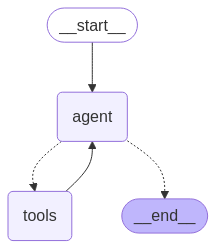

In [23]:
# Import relevant functionality
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

# Create the agent
memory = MemorySaver()
model = init_chat_model("gpt-4o-mini", model_provider="openai")
search = TavilySearchResults(max_results=2)
tools = [search]
agent_executor = create_react_agent(model, tools, checkpointer=memory)

agent_executor

Agent Executor is a graph!

In [ ]:
# We pass config because this agent has memory so we need to pass a thread_id
config = {"configurable": {"thread_id": "abc123"}}
# Below we can't just invoke on "input" we use "messages" because the agent expects a list of messages (this info is hidden in the create_react_agent function)
agent_executor.invoke({"messages": [HumanMessage("What is the capital of Brazil?")]}, config=config)

In [29]:
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="whats the weather in sf?")]},
    stream_mode="values",
    config=config
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

whats the weather in sf?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_IaRy6kwWmPZrKc98IOPUQMnf)
 Call ID: call_IaRy6kwWmPZrKc98IOPUQMnf
  Args:
    query: San Francisco weather
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://weathershogun.com/weather/usa/ca/san-francisco/480/april/2025-04-16", "content": "San Francisco, California Weather: Wednesday, April 16, 2025. Cloudy weather, overcast skies with clouds. Day 66°. Night 54°."}, {"url": "https://www.metcheck.com/WEATHER/dayforecast.asp?location=San%20Francisco&locationID=1547119&lat=9.528060&lon=125.485560&dateFor=11/01/2025", "content": "Weather Forecast for San Francisco for Wednesday 16 April · Wet Only · Dry Only · Dry & Wet. Wednesday 16 April☀ △ 5:27 17:47 ▽ ☼. 1:00"}]
============

In [42]:
# !pip install langchain-ollama

from langchain.chat_models import init_chat_model

local_llm = init_chat_model("mistral-small3.1", model_provider="ollama")

local_llm.invoke("What is the capital of Brazil?")

AIMessage(content='The capital of Brazil is Brasília.', additional_kwargs={}, response_metadata={'model': 'mistral-small3.1', 'created_at': '2025-04-16T13:27:24.703366Z', 'done': True, 'done_reason': 'stop', 'total_duration': 950713042, 'load_duration': 40667000, 'prompt_eval_count': 365, 'prompt_eval_duration': 561708042, 'eval_count': 9, 'eval_duration': 347052125, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-169166df-e450-432c-b447-c24d8091f79a-0', usage_metadata={'input_tokens': 365, 'output_tokens': 9, 'total_tokens': 374})

In [43]:
search = TavilySearchResults(max_results=2)
tools = [search]
agent_executor = create_react_agent(local_llm, tools)

In [44]:
agent_executor.invoke({"messages": [HumanMessage("Which teams are officialy on the playoffs in the NBA right now?")]})

{'messages': [HumanMessage(content='Which teams are officialy on the playoffs in the NBA right now?', additional_kwargs={}, response_metadata={}, id='e6543185-e304-4312-b024-5aa0cc2b3a63'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'mistral-small3.1', 'created_at': '2025-04-16T13:27:49.558566Z', 'done': True, 'done_reason': 'stop', 'total_duration': 2027579625, 'load_duration': 39010792, 'prompt_eval_count': 457, 'prompt_eval_duration': 894519541, 'eval_count': 26, 'eval_duration': 1092469375, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-b67cf614-4a0d-429f-803a-22d185d9d319-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'NBA teams currently in the playoffs'}, 'id': 'f847cd26-e7aa-49ee-a42e-b184c3d18a19', 'type': 'tool_call'}], usage_metadata={'input_tokens': 457, 'output_tokens': 26, 'total_tokens': 483}),
  ToolMessage(content='[{"url": "https://www.foxsports.com/stories/nba/nba-playo